## TTC delay data

- Preliminary data cleaning + start of some EDA. 
- Notebook by [Carol Zhang](https://github.com/carolyz) Nov 12 2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('data/delay.xlsx',sheetname='Sheet 1')
df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
1,2014-01-01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
2,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
3,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386
4,2014-01-01,03:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,E,BD,5174


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69043 entries, 0 to 69042
Data columns (total 10 columns):
Date         69043 non-null datetime64[ns]
Time         69043 non-null object
Day          69043 non-null object
Station      69043 non-null object
Code         69043 non-null object
Min Delay    69043 non-null int64
Min Gap      69043 non-null int64
Bound        54249 non-null object
Line         68745 non-null object
Vehicle      69043 non-null int64
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 5.3+ MB


### Data cleaning

- Drop unnecessary cols `Code`,`Vehicle`
- Convert `Time` from `str` to `time`
- Remove data during when the subway is closed
- Check for missing data

In [4]:
df.drop(['Code', 'Vehicle'], axis=1,inplace=True)
df.head()

,Date,Time,Day,Station,Min Delay,Min Gap,Bound,Line
0,2014-01-01,02:06,Wednesday,HIGH PARK STATION,3,7,W,BD
1,2014-01-01,02:40,Wednesday,SHEPPARD STATION,0,0,NaN,YU
2,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,3,8,W,BD
3,2014-01-01,03:20,Wednesday,BLOOR STATION,5,10,S,YU
4,2014-01-01,03:29,Wednesday,DUFFERIN STATION,0,0,E,BD


In [5]:
df['Time'] = pd.to_datetime(df['Time'],format='%H:%M').dt.time

In [6]:
#check if str to time conversion worked by outputting a time cell
df.iloc[0,1] 

datetime.time(2, 6)

On weekdays and Saturdays, trains run every few minutes from about 6 a.m. until 1:30 a.m. 

On Sundays, they run from about 8 a.m. to 1:30 a.m.

In [7]:
df['Hour'] = df['Time'].map(lambda x: x.hour)
df.head()

,Date,Time,Day,Station,Min Delay,Min Gap,Bound,Line,Hour
0,2014-01-01,02:06:00,Wednesday,HIGH PARK STATION,3,7,W,BD,2
1,2014-01-01,02:40:00,Wednesday,SHEPPARD STATION,0,0,NaN,YU,2
2,2014-01-01,03:10:00,Wednesday,LANSDOWNE STATION,3,8,W,BD,3
3,2014-01-01,03:20:00,Wednesday,BLOOR STATION,5,10,S,YU,3
4,2014-01-01,03:29:00,Wednesday,DUFFERIN STATION,0,0,E,BD,3


In [8]:
MF = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday']
SS = ['Saturday','Sunday']

weekday = df.loc[(df['Hour'] >= 6) & (df['Day'].isin(MF))]
# omitting 6AM-8AM bc I want the weekend data to have the same number of rows
weekend = df.loc[(df['Hour'] >= 8) & (df['Day'].isin(SS))]

In [9]:
# going to combine all the days in the week too..
ttc = df.loc[((df['Hour'] >= 6) & (df['Day'].isin(MF))) | ((df['Hour'] >= 8) & (df['Day'].isin(SS)))]
ttc.head()

,Date,Time,Day,Station,Min Delay,Min Gap,Bound,Line,Hour
5,2014-01-01,07:31:00,Wednesday,NORTH YORK CENTRE STAT,0,0,NaN,YU,7
6,2014-01-01,07:32:00,Wednesday,SHEPPARD STATION,0,0,NaN,YU,7
7,2014-01-01,07:34:00,Wednesday,RUNNYMEDE STATION,0,0,NaN,BD,7
8,2014-01-01,07:34:00,Wednesday,QUEEN STATION EAST SID,0,0,NaN,YU,7
9,2014-01-01,07:53:00,Wednesday,ST ANDREW STATION,0,0,NaN,YU,7


In [10]:
# np.set_printoptions(threshold=np.nan)
# ttc['Station'].unique()

In [12]:
# ttc[ttc['Station'].str.contains("\(")]

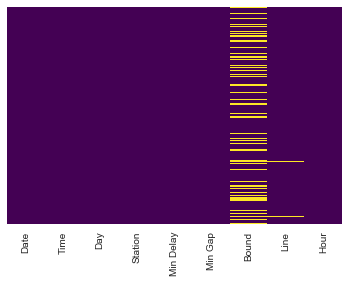

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
df.loc[df['Bound'].isnull()]

,Date,Time,Day,Station,Min Delay,Min Gap,Bound,Line,Hour
1,2014-01-01,02:40:00,Wednesday,SHEPPARD STATION,0,0,NaN,YU,2
5,2014-01-01,07:31:00,Wednesday,NORTH YORK CENTRE STAT,0,0,NaN,YU,7
6,2014-01-01,07:32:00,Wednesday,SHEPPARD STATION,0,0,NaN,YU,7
7,2014-01-01,07:34:00,Wednesday,RUNNYMEDE STATION,0,0,NaN,BD,7
8,2014-01-01,07:34:00,Wednesday,QUEEN STATION EAST SID,0,0,NaN,YU,7
9,2014-01-01,07:53:00,Wednesday,ST ANDREW STATION,0,0,NaN,YU,7
10,2014-01-01,08:20:00,Wednesday,WELLESLEY STATION,0,0,NaN,YU,8
17,2014-01-01,09:10:00,Wednesday,WILSON CARHOUSE (10 TR,0,0,NaN,YU,9
33,2014-01-01,18:37:00,Wednesday,DUNDAS WEST STATION,0,0,NaN,BD,18
39,2014-01-01,23:22:00,Wednesday,VICTORIA PARK STATION,0,0,NaN,BD,23


In [15]:
df.loc[df['Line'].isnull()]

,Date,Time,Day,Station,Min Delay,Min Gap,Bound,Line,Hour
69,2014-01-02,08:59:00,Thursday,BLOOR,0,0,S,NaN,8
325,2014-01-07,09:13:00,Tuesday,ST GEORGE STATION,0,0,N,NaN,9
486,2014-01-09,14:31:00,Thursday,FINCH STATION,0,0,NaN,NaN,14
677,2014-01-13,06:30:00,Monday,QUEEN STATION - ALBERT,0,0,NaN,NaN,6
905,2014-01-17,08:13:00,Friday,DON MILLS STN,0,0,NaN,NaN,8
1178,2014-01-22,05:10:00,Wednesday,YONGE STATION,0,0,NaN,NaN,5
1420,2014-01-27,05:15:00,Monday,QUEEN ALBERT,0,0,NaN,NaN,5
1605,2014-01-29,09:38:00,Wednesday,MCBRIEN BUILDING,0,0,NaN,NaN,9
1611,2014-01-29,12:36:00,Wednesday,RONCEVALLES DIVISION,0,0,NaN,NaN,12
1738,2014-01-31,10:38:00,Friday,KING AND BATHRUST,0,0,NaN,NaN,10


A lot of rows with no line information have stations that are not for commuter use, so it's safe to drop those rows.

In [16]:
ttc = ttc.loc[~df['Line'].isnull()]

In [17]:
ttc.describe()

,Min Delay,Min Gap,Hour
count,60959.000000,60959.000000,60959.000000
mean,1.805410,2.715087,14.415378
std,8.621229,8.710495,5.125181
min,0.000000,0.000000,6.000000
25%,0.000000,0.000000,10.000000
50%,0.000000,0.000000,15.000000
75%,3.000000,5.000000,19.000000
max,999.000000,999.000000,23.000000


In [18]:
# there is a max of 999 minutes of delay.. drop it
# in fact, drop all delays > 2 hours
ttc = ttc.loc[ttc['Min Delay'] < 120]

In [19]:
ttc.shape

(60935, 9)

### Ideas for analysis

Check delays by time of day on weekdays, station, line, etc.

Example: check Friday delays on Line 1

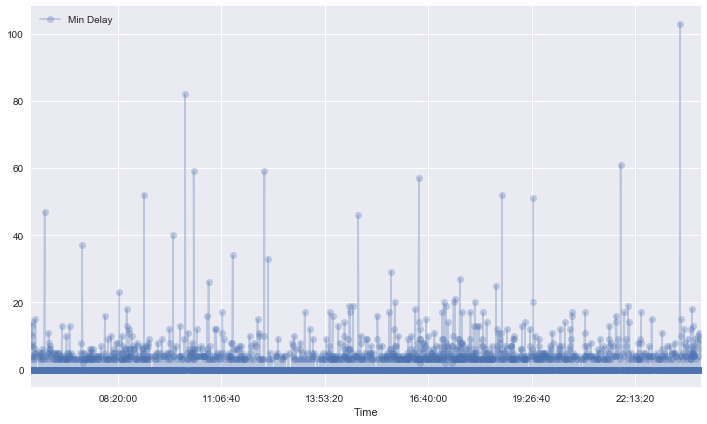

In [20]:
ttc.loc[(ttc['Line']=='YU') & (ttc['Day']=='Friday')].plot.line(x='Time',y='Min Delay', marker='o', alpha=0.3,figsize=(12,7))